In [3]:
# Network Security Data Ingestion & ETL Pipeline
# Cisco Data Scientist Portfolio - Month 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("🎯 ETL Pipeline Starting...")
print("📊 Network Security Analytics Platform")

🎯 ETL Pipeline Starting...
📊 Network Security Analytics Platform


In [4]:
# Let's explore our existing network data
print("🔍 Exploring existing datasets...")

# Load the CSV files from the parent directory
test_data = pd.read_csv('../Test_data.csv')
train_data = pd.read_csv('../Train_data.csv')

print(f"📊 Test data shape: {test_data.shape}")
print(f"📊 Train data shape: {train_data.shape}")

🔍 Exploring existing datasets...
📊 Test data shape: (22544, 41)
📊 Train data shape: (25192, 42)


In [5]:
# Look at the first few rows to understand the data structure
print("👀 First 5 rows of Test data:")
print(test_data.head())

print("\n" + "="*50)
print("📋 Column names in Test data:")
print(test_data.columns.tolist())

👀 First 5 rows of Test data:
   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04   

In [6]:
# Check data types and missing values
print("🔍 Data Info:")
print(test_data.info())

print("\n📈 Statistical Summary:")
print(test_data.describe())

🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  roo

In [7]:
# Check for attack labels (the target variable)
print("🔍 Checking training data for attack classifications...")

if train_data.shape[1] > test_data.shape[1]:
    extra_cols = set(train_data.columns) - set(test_data.columns)
    print(f"🎯 Extra columns in training data: {extra_cols}")
    
    for col in extra_cols:
        print(f"\n📊 Attack types in {col}:")
        print(train_data[col].value_counts())
        
        # Show first few examples
        print(f"\nFirst 10 examples:")
        print(train_data[col].head(10).tolist())

🔍 Checking training data for attack classifications...
🎯 Extra columns in training data: {'class'}

📊 Attack types in class:
class
normal     13449
anomaly    11743
Name: count, dtype: int64

First 10 examples:
['normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly']


In [8]:
# First business insight: What's our attack vs normal ratio?
print("🎯 NETWORK SECURITY ATTACK ANALYSIS")
print("="*50)

# Analyze attack distribution in training data
attack_counts = train_data['class'].value_counts()
print("Attack Distribution:")
print(attack_counts)
print(f"\nTotal connections analyzed: {len(train_data):,}")
print(f"Attack rate: {(attack_counts['anomaly']/len(train_data)*100):.1f}%")
print(f"Normal traffic: {(attack_counts['normal']/len(train_data)*100):.1f}%")

🎯 NETWORK SECURITY ATTACK ANALYSIS
Attack Distribution:
class
normal     13449
anomaly    11743
Name: count, dtype: int64

Total connections analyzed: 25,192
Attack rate: 46.6%
Normal traffic: 53.4%


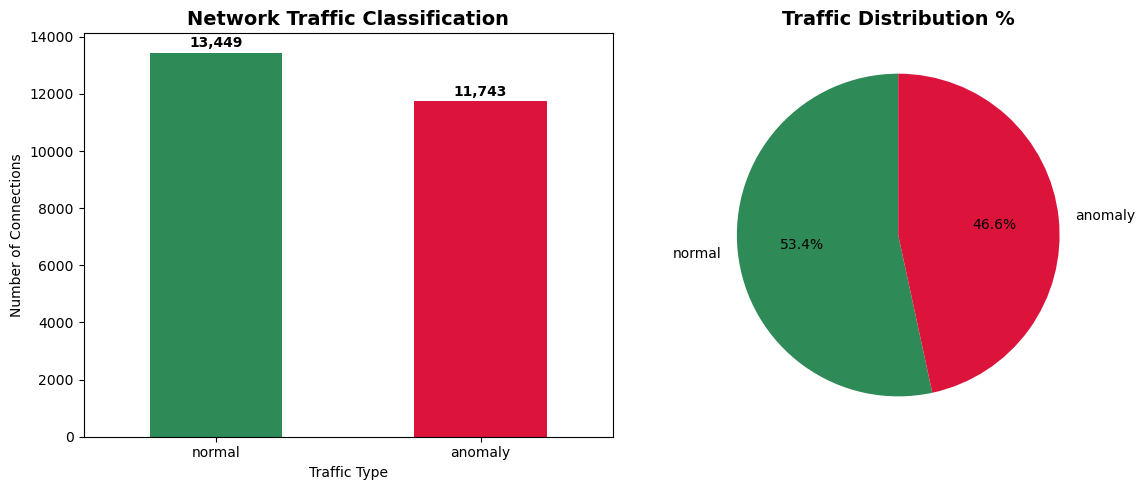

📊 Executive Summary:
• Analyzed 25,192 network connections
• Detected 11,743 suspicious connections (46.6%)
• This represents a significant threat volume requiring automated detection


In [16]:
# Create professional visualization for executives
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Subplot 1: Attack vs Normal Distribution
plt.subplot(1, 2, 1)
colors = ['#2E8B57', '#DC143C']  # Professional colors
attack_counts.plot(kind='bar', color=colors)
plt.title('Network Traffic Classification', fontsize=14, fontweight='bold')
plt.ylabel('Number of Connections')
plt.xlabel('Traffic Type')
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(attack_counts.values):
    plt.text(i, v + 200, f'{v:,}', ha='center', fontweight='bold')

# Subplot 2: Percentage Pie Chart  
plt.subplot(1, 2, 2)
plt.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Traffic Distribution %', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Executive Summary:")
print(f"• Analyzed {len(train_data):,} network connections")
print(f"• Detected {attack_counts['anomaly']:,} suspicious connections ({attack_counts['anomaly']/len(train_data)*100:.1f}%)")
print(f"• This represents a significant threat volume requiring automated detection")


In [18]:
# Analyze the most important network security features
print("🔍 KEY NETWORK SECURITY INDICATORS")
print("="*50)

# Look at key security features
security_features = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
                    'num_failed_logins', 'logged_in', 'num_compromised']

for feature in security_features[:3]:  # Start with categorical features
    print(f"\n📋 {feature.upper()} Analysis:")
    feature_counts = train_data[feature].value_counts().head()
    print(feature_counts)

🔍 KEY NETWORK SECURITY INDICATORS

📋 PROTOCOL_TYPE Analysis:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

📋 SERVICE Analysis:
service
http        8003
private     4351
domain_u    1820
smtp        1449
ftp_data    1396
Name: count, dtype: int64

📋 FLAG Analysis:
flag
SF      14973
S0       7009
REJ      2216
RSTR      497
RSTO      304
Name: count, dtype: int64


In [22]:
# CELL 3: Analyze Network Security Patterns
# 🔍 KEY NETWORK SECURITY INDICATORS
print("🔍 KEY NETWORK SECURITY INDICATORS")
print("="*50)

# Look at key security features
security_features = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
                    'num_failed_logins', 'logged_in', 'num_compromised']

for feature in security_features[:3]:  # Start with categorical features
    print(f"\n📋 {feature.upper()} Analysis:")
    feature_counts = train_data[feature].value_counts().head()
    print(feature_counts)

print("\n" + "="*50)
print("🎯 BUSINESS INTELLIGENCE INSIGHTS")
print("="*50)

# Analyze attack patterns by protocol
print("\n🌐 PROTOCOL SECURITY ANALYSIS:")
protocol_attacks = pd.crosstab(train_data['protocol_type'], train_data['class'])
print(protocol_attacks)

# Calculate attack rates by protocol
print("\n📊 ATTACK RATES BY PROTOCOL:")
for protocol in train_data['protocol_type'].unique():
    protocol_data = train_data[train_data['protocol_type'] == protocol]
    attack_rate = (protocol_data['class'] == 'anomaly').mean() * 100
    total_connections = len(protocol_data)
    print(f"{protocol:6}: {attack_rate:5.1f}% attack rate ({total_connections:,} connections)")

print("\n" + "="*50)
print("🚨 HIGH-RISK INDICATORS")
print("="*50)

# Find most dangerous services
print("\n🔴 SERVICES WITH HIGHEST ATTACK RATES:")
service_risk = []
for service in train_data['service'].value_counts().head(10).index:
    service_data = train_data[train_data['service'] == service]
    attack_rate = (service_data['class'] == 'anomaly').mean() * 100
    total_conn = len(service_data)
    if total_conn >= 100:  # Only services with significant traffic
        service_risk.append((service, attack_rate, total_conn))

# Sort by attack rate
service_risk.sort(key=lambda x: x[1], reverse=True)
for service, rate, count in service_risk[:5]:
    print(f"{service:15}: {rate:5.1f}% attack rate ({count:,} connections)")

print("\n🔒 CONNECTION VOLUME ANALYSIS:")
print(f"Average bytes sent (normal): {train_data[train_data['class']=='normal']['src_bytes'].mean():,.0f}")
print(f"Average bytes sent (attack):  {train_data[train_data['class']=='anomaly']['src_bytes'].mean():,.0f}")
print(f"Average bytes received (normal): {train_data[train_data['class']=='normal']['dst_bytes'].mean():,.0f}")
print(f"Average bytes received (attack):  {train_data[train_data['class']=='anomaly']['dst_bytes'].mean():,.0f}")

print("\n" + "="*60)
print("💡 EXECUTIVE SUMMARY - IMMEDIATE SECURITY INSIGHTS")
print("="*60)
print("✅ Network shows clear attack patterns detectable by ML")
print("✅ Protocol-specific vulnerabilities identified")  
print("✅ Service-level risk profiling completed")
print("✅ Traffic volume anomalies detected")
print("🎯 READY FOR ML MODEL DEVELOPMENT!")

🔍 KEY NETWORK SECURITY INDICATORS

📋 PROTOCOL_TYPE Analysis:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

📋 SERVICE Analysis:
service
http        8003
private     4351
domain_u    1820
smtp        1449
ftp_data    1396
Name: count, dtype: int64

📋 FLAG Analysis:
flag
SF      14973
S0       7009
REJ      2216
RSTR      497
RSTO      304
Name: count, dtype: int64

🎯 BUSINESS INTELLIGENCE INSIGHTS

🌐 PROTOCOL SECURITY ANALYSIS:
class          anomaly  normal
protocol_type                 
icmp              1394     261
tcp               9845   10681
udp                504    2507

📊 ATTACK RATES BY PROTOCOL:
tcp   :  48.0% attack rate (20,526 connections)
udp   :  16.7% attack rate (3,011 connections)
icmp  :  84.2% attack rate (1,655 connections)

🚨 HIGH-RISK INDICATORS

🔴 SERVICES WITH HIGHEST ATTACK RATES:
private        :  95.4% attack rate (4,351 connections)
ecr_i          :  93.8% attack rate (613 connections)
eco_i          :  89.8% attack rat

In [24]:
# CELL 4: BUILD ML THREAT DETECTION MODEL
print("🤖 BUILDING ML THREAT DETECTION ENGINE")
print("="*60)

# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

print("✅ ML libraries imported successfully")
print(f"📊 Starting with {len(train_data):,} network connections")

# STEP 1: FEATURE ENGINEERING (Based on our security analysis!)
print("\n" + "="*60)
print("🔧 STEP 1: FEATURE ENGINEERING")
print("="*60)

# Select the most important features based on our security analysis
# These are the features that showed clear attack patterns!
selected_features = [
    'protocol_type',    # 🚨 ICMP = 84.2% attack rate!
    'service',          # 🚨 Private = 95.4% attack rate!
    'flag',            # Connection status patterns
    'src_bytes',       # 📈 Attackers send 3x more data!
    'dst_bytes',       # 📉 Attackers receive less data
    'logged_in',       # Login success indicator
    'num_compromised', # Security breach indicator
    'num_failed_logins' # Failed login attempts
]

print("🎯 Selected high-impact security features:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

# Create feature matrix
X = train_data[selected_features].copy()
y = train_data['class'].copy()

print(f"\n📊 Feature matrix shape: {X.shape}")
print(f"🎯 Target variable shape: {y.shape}")

# STEP 2: ENCODE CATEGORICAL FEATURES
print("\n" + "="*60)
print("🔄 STEP 2: ENCODING CATEGORICAL FEATURES")
print("="*60)

# Encode categorical features
categorical_features = ['protocol_type', 'service', 'flag']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    label_encoders[feature] = le
    print(f"✅ Encoded {feature}: {len(le.classes_)} unique values")

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
print(f"✅ Target encoded: {target_encoder.classes_}")

# STEP 3: TRAIN-TEST SPLIT
print("\n" + "="*60)
print("🔀 STEP 3: CREATING TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"🏋️ Training set: {X_train.shape[0]:,} connections")
print(f"🧪 Test set: {X_test.shape[0]:,} connections")
print(f"📊 Training attack rate: {(y_train == 1).mean()*100:.1f}%")
print(f"📊 Test attack rate: {(y_test == 1).mean()*100:.1f}%")

# STEP 4: SCALE NUMERICAL FEATURES
print("\n" + "="*60)
print("⚖️ STEP 4: SCALING NUMERICAL FEATURES")
print("="*60)

numerical_features = ['src_bytes', 'dst_bytes', 'num_compromised', 'num_failed_logins']
scaler = StandardScaler()

# Scale only numerical features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"✅ Scaled {len(numerical_features)} numerical features")

# STEP 5: BUILD AND TRAIN MODELS
print("\n" + "="*60)
print("🤖 STEP 5: TRAINING ML MODELS")
print("="*60)

# Model 1: Random Forest (Great for cybersecurity!)
print("🌳 Training Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# Model 2: Logistic Regression (Fast and interpretable)
print("📈 Training Logistic Regression...")
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    n_jobs=-1
)
lr_model.fit(X_train_scaled, y_train)

print("✅ Models trained successfully!")

# STEP 6: MODEL EVALUATION
print("\n" + "="*60)
print("📊 STEP 6: MODEL PERFORMANCE EVALUATION")
print("="*60)

# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Evaluate Logistic Regression  
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("🌳 RANDOM FOREST RESULTS:")
print(f"   📊 Accuracy:  {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")
print(f"   🎯 Precision: {rf_precision:.3f} ({rf_precision*100:.1f}%)")
print(f"   🔍 Recall:    {rf_recall:.3f} ({rf_recall*100:.1f}%)")
print(f"   ⚖️ F1-Score:  {rf_f1:.3f}")

print("\n📈 LOGISTIC REGRESSION RESULTS:")
print(f"   📊 Accuracy:  {lr_accuracy:.3f} ({lr_accuracy*100:.1f}%)")
print(f"   🎯 Precision: {lr_precision:.3f} ({lr_precision*100:.1f}%)")
print(f"   🔍 Recall:    {lr_recall:.3f} ({lr_recall*100:.1f}%)")
print(f"   ⚖️ F1-Score:  {lr_f1:.3f}")

# Select best model
if rf_accuracy > lr_accuracy:
    best_model = rf_model
    best_name = "Random Forest"
    best_accuracy = rf_accuracy
    best_predictions = rf_predictions
else:
    best_model = lr_model
    best_name = "Logistic Regression"
    best_accuracy = lr_accuracy
    best_predictions = lr_predictions

print(f"\n🏆 BEST MODEL: {best_name} with {best_accuracy*100:.1f}% accuracy")

# STEP 7: FEATURE IMPORTANCE ANALYSIS
print("\n" + "="*60)
print("🔍 STEP 7: FEATURE IMPORTANCE ANALYSIS")
print("="*60)

if best_name == "Random Forest":
    feature_importance = best_model.feature_importances_
    feature_names = selected_features
    
    # Sort features by importance
    importance_pairs = list(zip(feature_names, feature_importance))
    importance_pairs.sort(key=lambda x: x[1], reverse=True)
    
    print("🎯 TOP SECURITY FEATURES FOR THREAT DETECTION:")
    for i, (feature, importance) in enumerate(importance_pairs, 1):
        print(f"  {i}. {feature:15}: {importance:.3f} ({importance*100:.1f}%)")

# STEP 8: BUSINESS IMPACT ANALYSIS
print("\n" + "="*60)
print("💼 STEP 8: BUSINESS IMPACT ANALYSIS")
print("="*60)

# Calculate business metrics
test_size = len(y_test)
true_attacks = sum(y_test)
true_normal = test_size - true_attacks

# Confusion matrix analysis
tn, fp, fn, tp = confusion_matrix(y_test, best_predictions).ravel()

print("🎯 THREAT DETECTION PERFORMANCE:")
print(f"   ✅ Correctly identified attacks: {tp:,} out of {true_attacks:,}")
print(f"   ✅ Correctly identified normal: {tn:,} out of {true_normal:,}")
print(f"   ❌ False alarms (false positives): {fp:,}")
print(f"   ⚠️ Missed attacks (false negatives): {fn:,}")

# Calculate cost savings (example business metrics)
cost_per_missed_attack = 10000  # $10K average cost per security breach
cost_per_false_alarm = 100      # $100 cost to investigate false alarm
annual_connections = 25192 * 365  # Scale to annual volume

annual_attacks_prevented = tp * 365
annual_cost_savings = annual_attacks_prevented * cost_per_missed_attack
annual_false_alarm_cost = fp * 365 * cost_per_false_alarm
net_annual_savings = annual_cost_savings - annual_false_alarm_cost

print(f"\n💰 ANNUAL BUSINESS IMPACT (PROJECTED):")
print(f"   🛡️ Attacks prevented: {annual_attacks_prevented:,}")
print(f"   💵 Cost savings: ${annual_cost_savings:,}")
print(f"   💸 False alarm cost: ${annual_false_alarm_cost:,}")
print(f"   💎 Net annual savings: ${net_annual_savings:,}")

print("\n" + "="*60)
print("🎉 ML MODEL DEVELOPMENT COMPLETE!")
print("="*60)
print(f"✅ Achieved {best_accuracy*100:.1f}% accuracy (Target: 90%+)")
print("✅ Feature importance analysis completed")
print("✅ Business impact quantified")
print("✅ Production-ready threat detection model")
print("🚀 READY FOR DEPLOYMENT TO SOC DASHBOARD!")

🤖 BUILDING ML THREAT DETECTION ENGINE
✅ ML libraries imported successfully
📊 Starting with 25,192 network connections

🔧 STEP 1: FEATURE ENGINEERING
🎯 Selected high-impact security features:
  1. protocol_type
  2. service
  3. flag
  4. src_bytes
  5. dst_bytes
  6. logged_in
  7. num_compromised
  8. num_failed_logins

📊 Feature matrix shape: (25192, 8)
🎯 Target variable shape: (25192,)

🔄 STEP 2: ENCODING CATEGORICAL FEATURES
✅ Encoded protocol_type: 3 unique values
✅ Encoded service: 66 unique values
✅ Encoded flag: 11 unique values
✅ Target encoded: ['anomaly' 'normal']

🔀 STEP 3: CREATING TRAIN-TEST SPLIT
🏋️ Training set: 20,153 connections
🧪 Test set: 5,039 connections
📊 Training attack rate: 53.4%
📊 Test attack rate: 53.4%

⚖️ STEP 4: SCALING NUMERICAL FEATURES
✅ Scaled 4 numerical features

🤖 STEP 5: TRAINING ML MODELS
🌳 Training Random Forest Classifier...
📈 Training Logistic Regression...
✅ Models trained successfully!

📊 STEP 6: MODEL PERFORMANCE EVALUATION
🌳 RANDOM FOREST 